In [ ]:
import os
import numpy as np
from google.colab import drive

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define the directory in Google Drive where the data splits are saved
# Assuming the shared folder is directly under "Shared with me"
# You might need to adjust the path based on the actual location and name of the shared folder
drive_save_path_splits = '/content/drive/MyDrive/cremad_data_splits'


# Load the split data
X_train = np.load(os.path.join(drive_save_path_splits, 'X_train.npy'))
X_val = np.load(os.path.join(drive_save_path_splits, 'X_val.npy'))
X_test = np.load(os.path.join(drive_save_path_splits, 'X_test.npy'))
y_train = np.load(os.path.join(drive_save_path_splits, 'y_train.npy'))
y_val = np.load(os.path.join(drive_save_path_splits, 'y_val.npy'))
y_test = np.load(os.path.join(drive_save_path_splits, 'y_test.npy'))

# Get the input shape and number of classes


print("Data splits loaded successfully from Google Drive.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

Data splits loaded successfully from Google Drive.
X_train shape: (4464, 128, 216, 1)
X_val shape: (1489, 128, 216, 1)
X_test shape: (1489, 128, 216, 1)
y_train shape: (4464,)
y_val shape: (1489,)
y_test shape: (1489,)


In [ ]:
# Reshape the input data to have 3 channels
X_train = np.repeat(X_train, 3, axis=-1)
X_val = np.repeat(X_val, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print("Data reshaped to 3 channels.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

Data reshaped to 3 channels.
X_train shape: (4464, 128, 216, 3)
X_val shape: (1489, 128, 216, 3)
X_test shape: (1489, 128, 216, 3)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layer
base_model_new = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification layer on top of the VGG16 base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy', # Assuming y_train is integer encoded
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 216, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 216, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 216, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 108, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 108, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 108, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 54, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 27, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,862,214 (68.14 MB)

 Trainable params: 3,147,526 (12.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Additional Layers in the Head



In [ ]:

# Freeze the layers in the base VGG16 model
for layer in base_model_new.layers:
    layer.trainable = False

# Add new classification layers on top of the VGG16 base
x = Flatten()(base_model_new.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x) # Added another Dense layer
predictions = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=base_model_new.input, outputs=predictions)

# Compile the new model
model2.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 216, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 216, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 216, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 108, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 108, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 108, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 54, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 27, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,894,342 (68.26 MB)

 Trainable params: 3,179,654 (12.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.6273 - loss: 0.9742 - val_accuracy: 0.5581 - val_loss: 1.1841
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.6328 - loss: 0.9993 - val_accuracy: 0.4929 - val_loss: 1.3386
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.6492 - loss: 0.9436 - val_accuracy: 0.5547 - val_loss: 1.1905
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.6530 - loss: 0.9039 - val_accuracy: 0.5373 - val_loss: 1.1897
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.6743 - loss: 0.8559 - val_accuracy: 0.5453 - val_loss: 1.1795
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.6927 - loss: 0.8486 - val_accuracy: 0.5366 - val_loss: 1.2550
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.7050 - loss: 0.8071 - val_accuracy: 0.5615 - val_loss: 1.1831
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.7009 - loss: 0

KeyboardInterrupt: 

Test Loss: 1.2844
Test Accuracy: 0.5299
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       262
           1       0.52      0.56      0.54       259
           2       0.75      0.19      0.30       274
           3       0.58      0.56      0.57       228
           4       0.42      0.58      0.49       244
           5       0.73      0.65      0.69       222

    accuracy                           0.53      1489
   macro avg       0.58      0.54      0.52      1489
weighted avg       0.58      0.53      0.52      1489



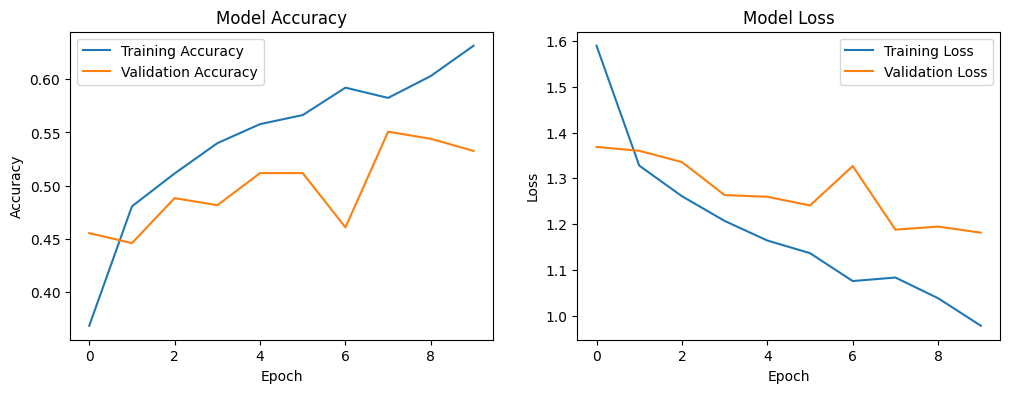

In [ ]:
evaluate_and_plot(model, X_test, y_test, history)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 221ms/step - accuracy: 0.3107 - loss: 1.7199 - val_accuracy: 0.4137 - val_loss: 1.4115
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.4403 - loss: 1.3941 - val_accuracy: 0.4587 - val_loss: 1.3397
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.5053 - loss: 1.2732 - val_accuracy: 0.5050 - val_loss: 1.2836
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.5311 - loss: 1.2245 - val_accuracy: 0.5185 - val_loss: 1.2478
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.5553 - loss: 1.1651 - val_accuracy: 0.5104 - val_loss: 1.2469
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.5675 - loss: 1.1310 - val_accuracy: 0.5245 - val_loss: 1.2197
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.6024 - loss: 1.0491 - val_accuracy: 0.4815 - val_loss: 1.3186
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.6009 - loss: 1

Test Loss: 1.3197
Test Accuracy: 0.5346
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.62      0.51       262
           1       0.44      0.59      0.51       259
           2       0.68      0.37      0.48       274
           3       0.64      0.46      0.54       228
           4       0.55      0.44      0.49       244
           5       0.63      0.75      0.68       222

    accuracy                           0.53      1489
   macro avg       0.56      0.54      0.53      1489
weighted avg       0.56      0.53      0.53      1489



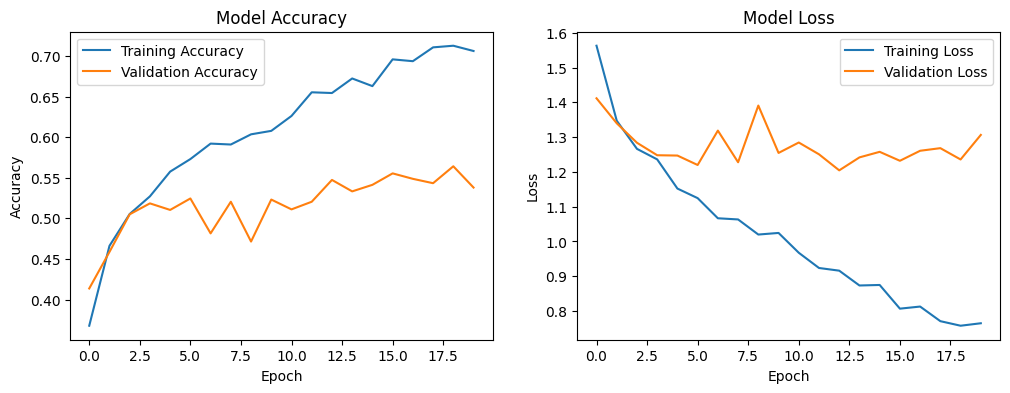

In [ ]:
evaluate_and_plot(model2, X_test, y_test, history2)

# LeakyRelu Activation

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU # Import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

for layer in base_model_new.layers:
    layer.trainable = False

x = Flatten()(base_model_new.output)

x = Dense(256)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(128)(x)
x = LeakyReLU(alpha=0.1)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=base_model_new.input, outputs=predictions)

# Compile the new model
model3.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 216, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 216, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 216, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 108, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 108, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 108, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 54, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 54, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 27, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 13, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           77

 Total params: 17,894,342 (68.26 MB)

 Trainable params: 3,179,654 (12.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.3181 - loss: 1.7374 - val_accuracy: 0.4406 - val_loss: 1.3855
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.4665 - loss: 1.3372 - val_accuracy: 0.4681 - val_loss: 1.3347
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.5002 - loss: 1.2669 - val_accuracy: 0.4621 - val_loss: 1.3231
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.5223 - loss: 1.2118 - val_accuracy: 0.4412 - val_loss: 1.4044
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.5401 - loss: 1.1694 - val_accuracy: 0.5010 - val_loss: 1.2897
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.5745 - loss: 1.1279 - val_accuracy: 0.5440 - val_loss: 1.1972
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.5921 - loss: 1.0652 - val_accuracy: 0.4621 - val_loss: 1.4094
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.5952 - loss: 1

Test Loss: 1.4272
Test Accuracy: 0.5185
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.14      0.23       262
           1       0.54      0.41      0.46       259
           2       0.53      0.66      0.59       274
           3       0.46      0.73      0.56       228
           4       0.50      0.42      0.46       244
           5       0.55      0.81      0.66       222

    accuracy                           0.52      1489
   macro avg       0.54      0.53      0.49      1489
weighted avg       0.55      0.52      0.49      1489



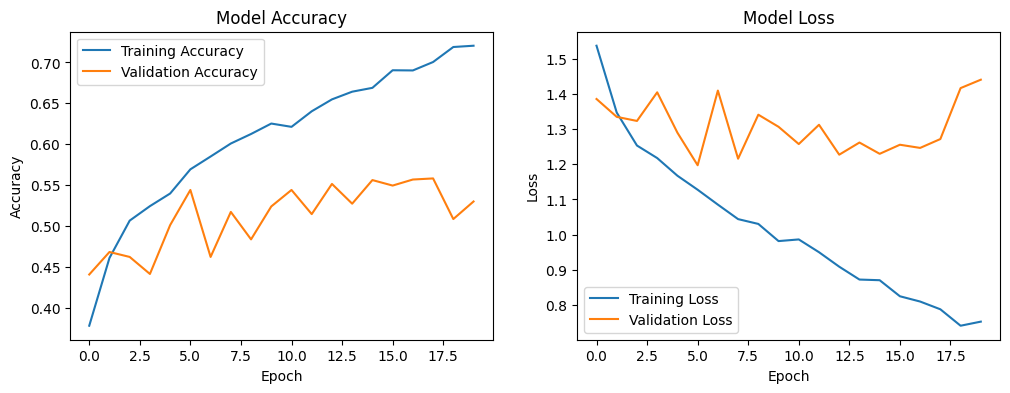

In [ ]:
evaluate_and_plot(model3, X_test, y_test, history3)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_plot(model, X_test, y_test, history):
    """
    Evaluates a trained model on test data, prints the classification report,
    and plots the training history.

    Args:
        model: The trained Keras model.
        X_test: The test features.
        y_test: The true test labels.
        history: The training history object returned by model.fit().
    """
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Predict the classes for the test data
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Generate and print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()